## <center>Simple Linear Regression Assignment(Salary data)</center>

#### Problem Statement:
<code style="background:lightblue;color:black">To Build a Simple Linear Regression Model for Predicting the Salary hike using the sorting time and performing the EDA and to do necessary transformations by choosing the best model.</code>

In [1]:
#Importing the necessary libraries for the model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from ml_metrics import rmse
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the csv file and having a glance at the data
SalaryData = pd.read_csv('Salary_Data.csv')
SalaryData.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### Making necessary EDA for the model

In [3]:
#Checking for null values in the data
SalaryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
#Checking for duplicate values and dropping them in the dataset
SalaryData[SalaryData.duplicated(keep = False)]

,YearsExperience,Salary


In [5]:
#checking the correlation of the dataset
SalaryData.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [6]:
#Inorder to avoid spacing columns are renamed
SalaryData = SalaryData.rename({'YearsExperience': 'YrsExp','Salary': 'salary'}, axis=1)
SalaryData.head()

,YrsExp,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<AxesSubplot:xlabel='Salary Data', ylabel='frequency'>

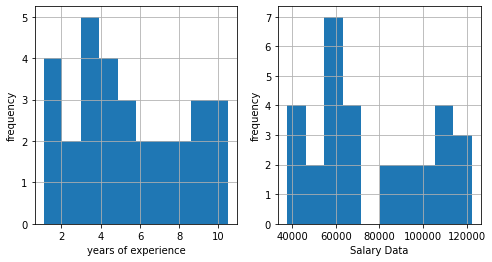

In [7]:
#checking for outliers if present in the dataset with the help of histogram plot
plt.figure(figsize = (8,4))

#outlier checking for SalaryData
plt.subplot(1,2,1)
plt.xlabel('years of experience')
plt.ylabel('frequency')
SalaryData['YrsExp'].hist()

#outlier checking for sorting time
plt.subplot(1,2,2)
plt.xlabel('Salary Data')
plt.ylabel('frequency')
SalaryData['salary'].hist()

<AxesSubplot:xlabel='salary', ylabel='Density'>

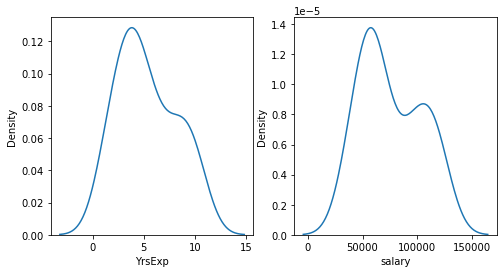

In [8]:
#checking if the data is Normally Distributed or not
plt.figure(figsize = (8,4))

#Normal distribution checking for delivery time
plt.subplot(1,2,1)
sns.kdeplot(SalaryData['YrsExp'])

#Normal distribution checking for sorting time
plt.subplot(1,2,2)
sns.kdeplot(SalaryData['salary'])

## Building various models
#### <code style="background:salmon;color:black">Model1:Building the model without applying any transformation</code>

In [9]:
#building a linear model with the help of ordinary least square method(OLS) and fitting it
model1 = smf.ols('salary~YrsExp', data =SalaryData).fit()

<AxesSubplot:xlabel='YrsExp', ylabel='salary'>

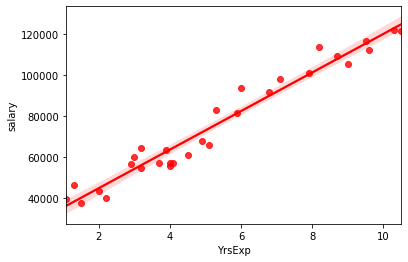

In [10]:
#Plotting the regression plot
sns.regplot(x="YrsExp", y="salary", data = SalaryData, color='red' )

In [11]:
#checking our intercept and slope values
model1.params

Intercept    25792.200199
YrsExp        9449.962321
dtype: float64

In [12]:
#Looking into our tvalues and pvalues to check the significant values
print(model1.tvalues, '\n', model1.pvalues)

Intercept    11.346940
YrsExp       24.950094
dtype: float64 
 Intercept    5.511950e-12
YrsExp       1.143068e-20
dtype: float64


In [13]:
#Knowing how much our input data is contributing to the output data i.e rsquare and adjusted rsquare values
(model1.rsquared,model1.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [14]:
#finally looking into summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           1.14e-20
Time:                        13:14:05   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YrsExp      9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#Predicting the values for the built model
pred1 = model1.predict(SalaryData.YrsExp)
pred1.head()

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

In [16]:
#actual data
actual_data = SalaryData.salary

In [17]:
#checking our root mean square error from predicted data with respect to actual data
root1=rmse(pred1,actual_data)
root1

5592.043608760662

#### <code style="background:salmon;color:black">Model2:Building the model by applying log transformation on the independent data</code>

In [18]:
#building a linear model with the help of ordinary least square method(OLS) and fitting it
model2 = smf.ols('salary~np.log(YrsExp)', data = SalaryData).fit()

In [19]:
#checking our intercept and slope values
model2.params

Intercept         14927.97177
np.log(YrsExp)    40581.98796
dtype: float64

In [20]:
#looking into summary for the evaluation metrics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           3.25e-13
Time:                        13:14:06   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YrsExp)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#Predicting the values for the built model
pred2 = model2.predict(SalaryData.YrsExp)
pred2.head()

0    18795.848339
1    25575.235192
2    31382.551905
3    43057.262306
4    46925.138875
dtype: float64

In [22]:
#checking our root mean square error from predicted data with respect to actual data
root2=rmse(pred2,actual_data)
root2

10302.893706228306

#### <code style="background:salmon;color:black">Model3:Building the model by applying  Exponential transformation on the independent data</code>

In [23]:
#building a exponential transform model with the help of ordinary least square method(OLS) and fitting it
model3 = smf.ols('salary~np.exp(YrsExp)', data = SalaryData).fit()

In [24]:
#checking our intercept and slope values
model3.params

Intercept         67568.624969
np.exp(YrsExp)        2.136040
dtype: float64

In [25]:
#looking into summary of the model
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           2.72e-05
Time:                        13:14:07   Log-Likelihood:                -339.03
No. Observations:                  30   AIC:                             682.1
Df Residuals:                      28   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.757e+04   4065.396     16.620      0.000    5.92e+04    7.59e+04
np.exp(YrsExp)     2.1360      0.427      5.007      0.000       1.262       3.010
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                1.966
Skew:                           0.276   Prob(JB):                        0.374
Kurtosis:                       1.874   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#Predicting the values for the built model
pred3=model3.predict(SalaryData.YrsExp)
pred3.head()

0    67575.041989
1    67576.462735
2    67578.198038
3    67584.408291
4    67587.902762
dtype: float64

In [27]:
#checking our root mean square error from predicted data with respect to actual data
root3=rmse(pred3,actual_data)
root3

19578.364073775407

#### <code style="background:salmon;color:black">Model4:Building the model by applying  Reciprocal transformation on the independent data</code>

In [28]:
#building a Reciprocal transform model with the help of ordinary least square method(OLS) and fitting it
model4 = smf.ols('salary~np.reciprocal(YrsExp)', data = SalaryData).fit()

In [29]:
#checking our intercept and slope values
model4.params

Intercept                104273.335111
np.reciprocal(YrsExp)   -103620.843905
dtype: float64

In [30]:
#looking into summary of the model
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     40.06
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           7.58e-07
Time:                        13:14:08   Log-Likelihood:                -335.30
No. Observations:                  30   AIC:                             674.6
Df Residuals:                      28   BIC:                             677.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.043e+05   5533.996     18.842      0.000    9.29e+04    1.16e+05
np.reciprocal(YrsExp) -1.036e+05   1.64e+04     -6.329      0.000   -1.37e+05   -7.01e+04
==============================================================================
Omnibus:                       10.284   Durbin-Watson:                   0.220
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                2.740
Skew:                           0.290   Prob(JB):                        0.254
Kurtosis:                       1.638   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#Predicting the values for the built model
pred4=model4.predict(SalaryData.YrsExp)
pred4.head()

0    10072.567925
1    24564.993646
2    35192.772508
3    52462.913159
4    57172.951518
dtype: float64

In [32]:
#checking our root mean square error from predicted data with respect to actual data
root4=rmse(pred4,actual_data)
root4

17288.30098984632

#### <code style="background:salmon;color:black">Model5:Building the model by applying  Squareroot transformation on the independent data</code>

In [33]:
#building a square root transform model with the help of ordinary least square method(OLS) and fitting it
model5 = smf.ols('salary~np.sqrt(YrsExp)', data = SalaryData).fit()

In [34]:
#checking our intercept and slope values
model5.params

Intercept         -16055.769117
np.sqrt(YrsExp)    41500.680583
dtype: float64

In [35]:
#looking into summary of the model
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           8.57e-18
Time:                        13:14:09   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YrsExp)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#Predicting the values for the built model
pred5 = (model5.predict(SalaryData.YrsExp))
pred5.head()

0    27470.511884
1    31262.287009
2    34771.976586
3    42635.056211
4    45499.687794
dtype: float64

In [37]:
#checking our root mean square error from predicted data with respect to actual data
root5=rmse(pred5,actual_data)
root5

7080.0957349830405

#### <code style="background:salmon;color:black">Model6:Building the model by applying  exponential transformation on the dependent data</code>

In [38]:
#building exponential transform on dependent model with the help of ordinary least square method(OLS) and fitting it
model6 = smf.ols('np.log(salary)~YrsExp', data = SalaryData).fit()

In [39]:
#checking our intercept and slope values
model6.params

Intercept    10.507402
YrsExp        0.125453
dtype: float64

In [40]:
#looking into summary of the model
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           7.03e-18
Time:                        13:14:10   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
YrsExp         0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#Predicting the values for the built model
pred6 = np.exp(model6.predict(SalaryData.YrsExp))
pred6.head()

0    41998.957468
1    43066.066794
2    44160.289228
3    47019.029189
4    48213.688474
dtype: float64

In [42]:
#checking our root mean square error from predicted data with respect to actual data
root6=rmse(pred6,actual_data)
root6

7213.235076620096

#### <code style="background:salmon;color:black"> Model7:Building the model by applying  quadratic equation</code>

In [43]:
#Quadratic equation framing
SalaryData["YrExpsqr"]=SalaryData["YrsExp"]*SalaryData["YrsExp"]
SalaryData.head()

,YrsExp,salary,YrExpsqr
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84


In [45]:
#building a quadratic equation model with the help of ordinary least square method(OLS) and fitting it
model7=smf.ols('salary~YrsExp+YrExpsqr',data=SalaryData).fit()

In [46]:
#looking into summary of the model
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           3.59e-19
Time:                        13:18:52   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
YrsExp      9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
YrExpsqr      16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#Predicting the values for the built model
pred7=model7.predict(SalaryData)
pred7.head()

0    36419.979959
1    38279.705169
2    40140.741784
3    44799.070719
4    46664.697252
dtype: float64

In [48]:
#checking our root mean square error from predicted data with respect to actual data
root7=rmse(pred7,actual_data)
root7

5590.841479683287

In [49]:
#Finally putting all the models rsquare values and rmse values into one frame
Conclusion={"Model":pd.Series(["Model1","Model2","Model3","Model4","Model5","Model6","Model7"]),
     "Rsquared":(model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared,model6.rsquared,model7.rsquared),
     "Adj Rsquared":(model1.rsquared_adj,model2.rsquared_adj,model3.rsquared_adj,model4.rsquared_adj,model5.rsquared_adj,model6.rsquared_adj,model7.rsquared_adj),
            "RMSE":(root1,root2,root3,root4,root5,root6,root7)
    }
Conclusion=pd.DataFrame(Conclusion)
Conclusion

,Model,Rsquared,Adj Rsquared,RMSE
0,Model1,0.956957,0.955419,5592.043609
1,Model2,0.853889,0.848671,10302.893706
2,Model3,0.472384,0.453541,19578.364074
3,Model4,0.588595,0.573902,17288.300990
4,Model5,0.931001,0.928537,7080.095735
5,Model6,0.931967,0.929537,7213.235077
6,Model7,0.956975,0.953788,5590.841480


### Insights Drawn: 
>By Comparing all the seven models its assured that model1 is better to predict the Salary because the model1 has better Rsquare and Adjusted Rsquare value compared to other models and even the RMSE value is also almost less.